<a href="https://colab.research.google.com/github/rafavidal1709/projeto_aplicado_iv/blob/main/Carcara_targz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio
!pip install https://carcara.asav.com.br/package/Carcara.tar.gz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Carcara: filename=Carcara-1.0.0-py3-none-any.whl size=7916 sha256=ed4531d434d065c9e3de002faedd1329f5b621786819ed7705b7a4b01dd14dd2
  Stored in directory: /tmp/pip-ephem-wheel-cache-78uooonr/wheels/e3/73/c7/23a622037655643b17127b88e71beab039e973748d53b15922
Successfully built Carcara


In [6]:
from Carcara import Carcara

carcara = Carcara()
all_files = carcara.api.listFiles()

all_files[:10]

['2018_12_13.tif',
 '2018_12_13_scl.tif',
 '2018_12_18.tif',
 '2018_12_18_scl.tif',
 '2018_12_23.tif',
 '2018_12_23_scl.tif',
 '2018_12_28.tif',
 '2018_12_28_scl.tif',
 '2019_01_02.tif',
 '2019_01_02_scl.tif']

In [10]:
carcara.api.downloadFile('2018_12_13.tif')
carcara.api.downloadFile('2018_12_13_scl.tif')

Arquivo salvo em: 2018_12_13.tif
Arquivo salvo em: 2018_12_13_scl.tif


True

In [11]:
X = carcara.dataset.open_tif('2018_12_13')
print(X.shape)
mask = carcara.dataset.open_tif('2018_12_13_scl')
print(mask.shape)

(12, 3137, 2983)
(1, 3137, 2983)


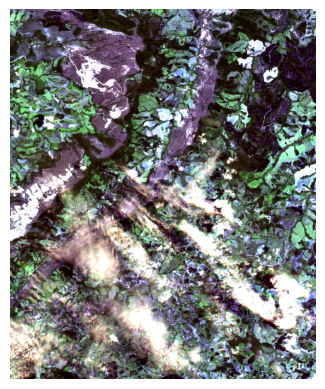

array([[[ 87.55741985,  87.810348  , 107.00876492],
        [ 95.12343253,  88.67156996, 108.67994116],
        [ 96.69968518,  87.810348  , 112.26103308],
        ...,
        [167.63105411, 230.77319339, 255.        ],
        [160.06504143, 219.8643819 , 243.80647656],
        [161.01079301, 215.27119811, 227.57219316]],

       [[ 93.54717989,  89.24571794, 110.82859631],
        [ 89.76417355,  88.95864395, 108.91868062],
        [ 91.97092725,  81.78179428, 110.82859631],
        ...,
        [192.8510964 , 248.57178057, 255.        ],
        [202.93911332, 255.        , 255.        ],
        [213.34238076, 255.        , 255.        ]],

       [[ 91.02517566,  88.95864395, 116.79708286],
        [ 92.28617778,  91.54230983, 115.60338555],
        [ 94.49293148,  78.62398043, 118.94573802],
        ...,
        [241.08442728, 255.        , 255.        ],
        [236.67091988, 255.        , 255.        ],
        [233.83366512, 255.        , 255.        ]],

       ...,

      

In [12]:
carcara.dataset.show(X, -21.69401, -44.88277, 2400, 2400, 1, 2, 3)